In [77]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [102]:
X, y = make_blobs(n_samples=1000, centers=[[-9,-8],[-10,6],[-10,0],[-5,-1],[0,7],[-2,3],[0,-8],[10,-5],[5, 0],[8,7]], n_features=2, random_state=1)
print(X.shape)

(1000, 2)


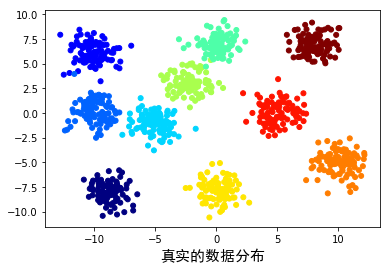

In [103]:
plt.scatter(X[:,0], X[:,1],c = y, marker = 'o', s = 25, cmap = plt.cm.get_cmap("jet",10))
plt.xlabel('真实的数据分布', fontproperties="SimHei", fontsize=15)
plt.show()

In [104]:
from sklearn.cluster import KMeans
y_pred_3 = KMeans(n_clusters=3, verbose = 1, n_jobs = -1, random_state=1).fit_predict(X)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 35976.61719003401
start iteration
done sorting
end inner loop
Iteration 1, inertia 33754.86011841394
start iteration
done sorting
end inner loop
Iteration 2, inertia 32888.05075119884
start iteration
done sorting
end inner loop
Iteration 3, inertia 30027.067905556167
start iteration
done sorting
end inner loop
Iteration 4, inertia 29012.870399971554
start iteration
done sorting
end inner loop
Iteration 5, inertia 28928.46408550669
start iteration
done sorting
end inner loop
Iteration 6, inertia 28888.679277780248
start iteration
done sorting
end inner loop
Iteration 7, inertia 28833.258585563886
start iteration
done sorting
end inner loop
Iteration 8, inertia 28795.65144077101
start iteration
done sorting
end inner loop
Iteration 9, inertia 28752.382746847317
start iteration
done sorting
end inner loop
Iteration 10, inertia 28713.104705636004
start iteration
done sorting
end inner loop
Iteration 11

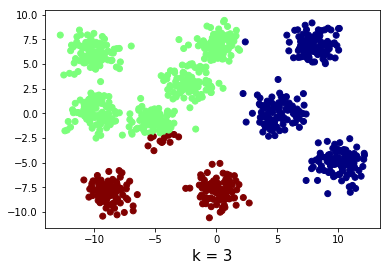

In [105]:
plt.scatter(X[:,0], X[:,1],c = y_pred_3, marker = 'o', cmap = plt.cm.get_cmap("jet",3))
plt.xlabel('k = 3', fontsize=15)
plt.show()

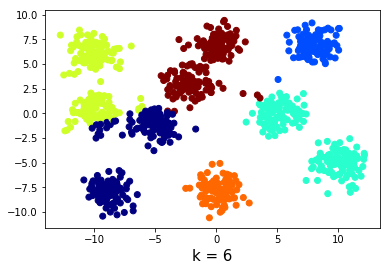

In [106]:
y_pred_6 = KMeans(n_clusters=6, verbose = 0, n_jobs = -1, random_state=1).fit_predict(X)
plt.scatter(X[:,0], X[:,1],c = y_pred_6, marker = 'o', cmap = plt.cm.get_cmap("jet",6))
plt.xlabel('k = 6', fontsize=15)
plt.show()

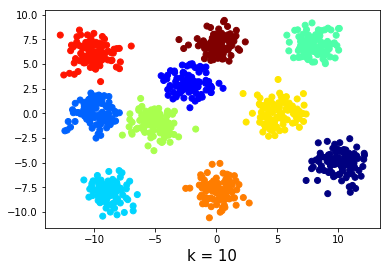

In [107]:
y_pred_10 = KMeans(n_clusters = 10, verbose = 0, n_jobs = -1, random_state=1).fit_predict(X)
plt.scatter(X[:,0], X[:,1],c = y_pred_10, marker = 'o', cmap = plt.cm.get_cmap("jet",10))
plt.xlabel('k = 10', fontsize=15)
plt.show()

## 聚类评估指标 silhouette_score和calinski_harabaz_score

start time:  2019-01-20 00:40:46
finish time:  2019-01-20 00:40:47


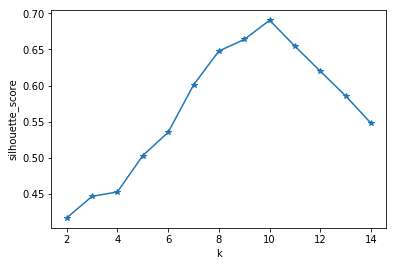

In [111]:
#簇的个数
import time
from sklearn.metrics import silhouette_score,calinski_harabaz_score
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
silhouette_scores = []
#轮廓系数silhouette_scores
print('start time: ',time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
for k in clusters:
    y_pred = KMeans(n_clusters = k, verbose = 0, n_jobs = -1, random_state=1).fit_predict(X)
    score = silhouette_score(X, y_pred)
    silhouette_scores.append(score)
print('finish time: ',time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
plt.plot(clusters, silhouette_scores, '*-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

start time:  2019-01-20 00:42:02
finish time:  2019-01-20 00:42:02


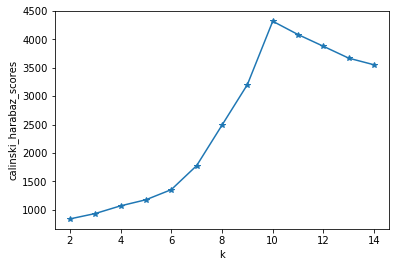

In [114]:
calinski_harabaz_scores = []
#calinski_harabasz_scores
print('start time: ',time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
for k in clusters:
    y_pred = KMeans(n_clusters = k, verbose = 0, n_jobs = -1, random_state = 1).fit_predict(X)
    score = calinski_harabaz_score(X, y_pred)
    calinski_harabaz_scores.append(score)
print('finish time: ',time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
plt.plot(clusters, calinski_harabaz_scores, '*-')
plt.xlabel('k')
plt.ylabel('calinski_harabaz_scores')
plt.show()

## bowl method

start time:  2019-01-20 00:41:01
finish time:  2019-01-20 00:41:02


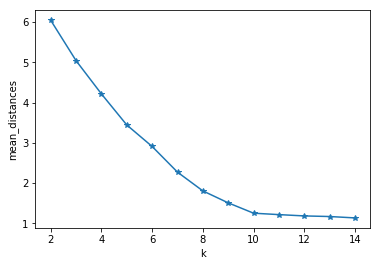

In [113]:
import numpy as np
from scipy.spatial.distance import cdist
mean_distances = []
print('start time: ',time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
for k in clusters:
    kmeans = KMeans(n_clusters = k, verbose = 0, n_jobs = -1, random_state = 1).fit(X)
    mean_distances.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])
print('finish time: ',time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
plt.plot(clusters, mean_distances, '*-')
plt.xlabel('k')
plt.ylabel('mean_distances')
plt.show()

## MiniBatchKMeans

In [117]:
from sklearn.cluster import MiniBatchKMeans
mini_batch_y_pred = MiniBatchKMeans(n_clusters=10, batch_size=50, verbose = 1, random_state=1).fit_predict(X)

Init 1/3 with method: k-means++
Inertia for init 1/3: 295.411363
Init 2/3 with method: k-means++
Inertia for init 2/3: 284.470405
Init 3/3 with method: k-means++
Inertia for init 3/3: 374.161643
Minibatch iteration 1/2000: mean batch inertia: 2.689564, ewa inertia: 2.689564 
Minibatch iteration 2/2000: mean batch inertia: 2.270181, ewa inertia: 2.647668 
Minibatch iteration 3/2000: mean batch inertia: 2.036061, ewa inertia: 2.586568 
Minibatch iteration 4/2000: mean batch inertia: 2.103216, ewa inertia: 2.538281 
Minibatch iteration 5/2000: mean batch inertia: 2.045457, ewa inertia: 2.489048 
Minibatch iteration 6/2000: mean batch inertia: 1.962612, ewa inertia: 2.436457 
Minibatch iteration 7/2000: mean batch inertia: 2.179780, ewa inertia: 2.410815 
Minibatch iteration 8/2000: mean batch inertia: 2.305989, ewa inertia: 2.400343 
Minibatch iteration 9/2000: mean batch inertia: 2.229762, ewa inertia: 2.383302 
Minibatch iteration 10/2000: mean batch inertia: 2.571837, ewa inertia: 2.40

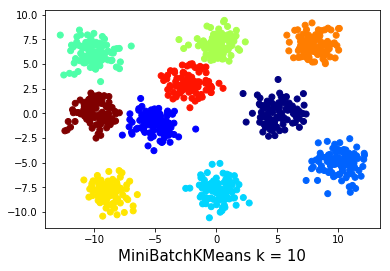

In [119]:
plt.scatter(X[:,0], X[:,1],c = mini_batch_y_pred, marker = 'o', cmap = plt.cm.get_cmap("jet",10))
plt.xlabel('MiniBatchKMeans k = 10', fontsize=15)
plt.show()